# About
#### This notebook is a practice project I did after completing the Data Visualization course by Kaggle. I included only those visualizations that'll entice beginners into Data Science ;)
#### I've learnt some Pandas functions from other excellent notebooks under this dataset, so credit to them. I'm really proud of how I picked up basics of Pandas along the way by only referring the documentation and stackoverflow.

## 1. Importing modules

In [1]:
!pip install -Uqq pandas

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Seeing how the data looks

In [3]:
dataFilepath = "../input/data-science-salaries-2023/ds_salaries.csv"

In [4]:
data = pd.read_csv(dataFilepath)

In [5]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## 3. The booming of Data Science

<AxesSubplot:title={'center':'Average Data Science Salaries by year'}, xlabel='Year', ylabel='Mean Salary'>

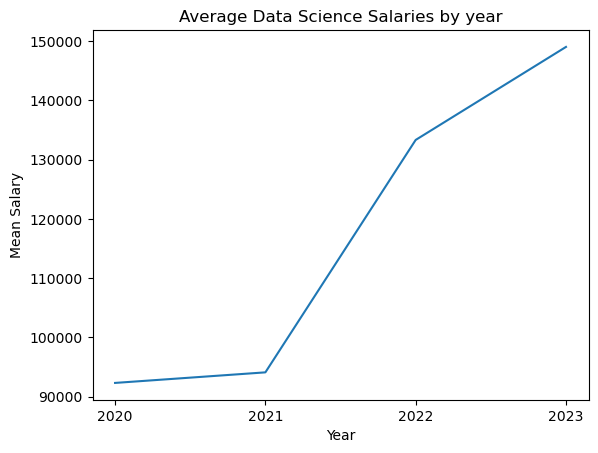

In [7]:
meanYearlySalary = np.array(data['salary_in_usd'].groupby(data['work_year']).mean())

plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.title("Average Data Science Salaries by year")
sns.lineplot(x=['2020', '2021', '2022', '2023'], y=meanYearlySalary)

## 4. The top job titles in the market

In [8]:
allTimeTopTen = data["job_title"].value_counts().nlargest(10).reset_index()
topTen2023 = data[data["work_year"]==2023]["job_title"].value_counts().nlargest(10).reset_index()

In [9]:
allTimeTopTen

,index,job_title
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
5,Data Architect,101
6,Research Scientist,82
7,Data Science Manager,58
8,Applied Scientist,58
9,Research Engineer,37


In [10]:
topTen2023

,index,job_title
0,Data Engineer,499
1,Data Scientist,370
2,Data Analyst,307
3,Machine Learning Engineer,158
4,Research Scientist,55
5,Data Architect,52
6,Analytics Engineer,46
7,Applied Scientist,40
8,Research Engineer,32
9,Data Manager,22


Text(0, 0.5, 'Job Title')

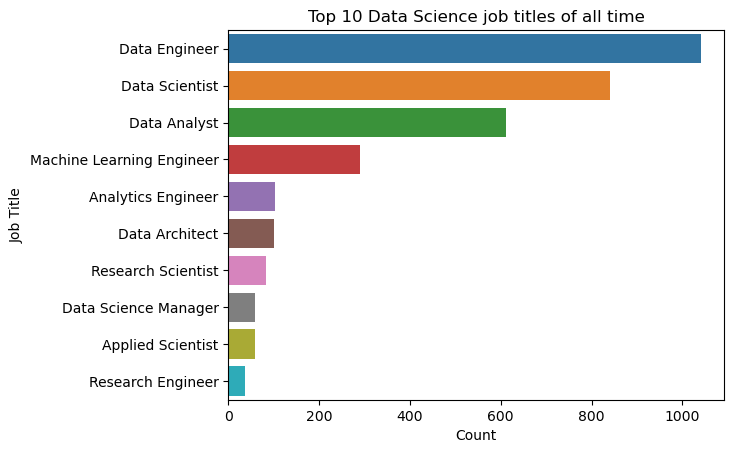

In [11]:
sns.barplot(x=allTimeTopTen["job_title"], y=allTimeTopTen["index"])
plt.title("Top 10 Data Science job titles of all time")
plt.xlabel("Count")
plt.ylabel("Job Title")

Text(0, 0.5, 'Job Title')

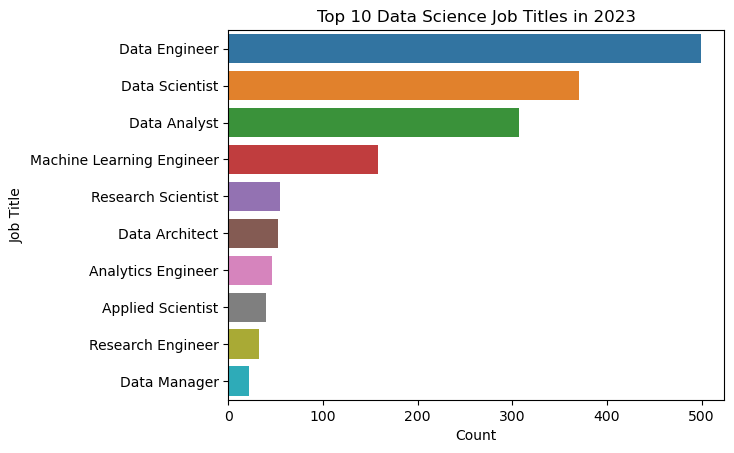

In [12]:
sns.barplot(x=topTen2023["job_title"], y=topTen2023["index"])
plt.title("Top 10 Data Science Job Titles in 2023")
plt.xlabel("Count")
plt.ylabel("Job Title")

## 5. Top Salaries

In [13]:
topSalaryInTopTen = data['salary_in_usd'].groupby(topTen2023['index']).mean().reset_index().sort_values('salary_in_usd', ascending=False)
topSalaryInTopTen

,index,salary_in_usd
3,Data Architect,222200.0
1,Applied Scientist,219000.0
7,Machine Learning Engineer,175000.0
5,Data Manager,147100.0
8,Research Engineer,141000.0
0,Analytics Engineer,136000.0
9,Research Scientist,120000.0
4,Data Engineer,85847.0
6,Data Scientist,30000.0
2,Data Analyst,25500.0


Text(0.5, 1.0, 'Average Salary of Top Ten Job titles in 2023')

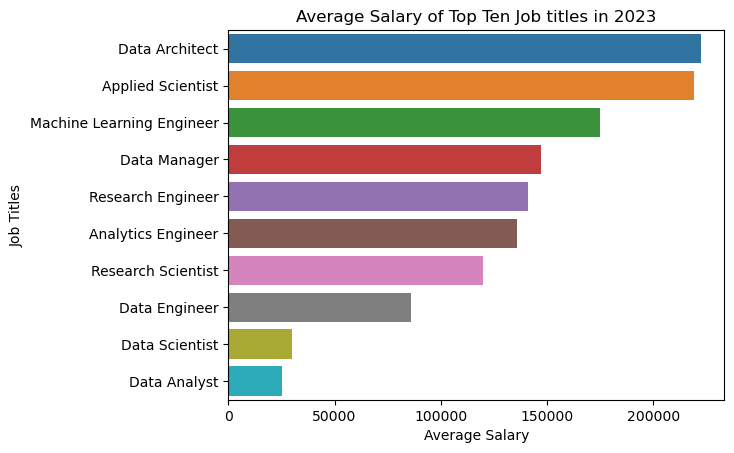

In [14]:
sns.barplot(x=topSalaryInTopTen['salary_in_usd'], y=topSalaryInTopTen['index'])
plt.xlabel('Average Salary')
plt.ylabel('Job Titles')
plt.title('Average Salary of Top Ten Job titles in 2023')

In [15]:
topSalaryJobs = data[data['work_year'] == 2023].nlargest(10, 'salary_in_usd').groupby('job_title').mean().reset_index().sort_values('salary_in_usd', ascending=False)
topSalaryJobs

,job_title,work_year,salary,salary_in_usd,remote_ratio
0,AI Scientist,2023.0,1500000.0,423834.0,0.0
3,Data Analyst,2023.0,385000.0,385000.0,0.0
4,Data Architect,2023.0,376080.0,376080.0,100.0
5,Data Scientist,2023.0,370000.0,370000.0,0.0
8,Research Scientist,2023.0,355000.0,355000.0,50.0
6,Director of Data Science,2023.0,353200.0,353200.0,0.0
1,Applied Scientist,2023.0,350000.0,350000.0,0.0
2,Computer Vision Engineer,2023.0,342810.0,342810.0,0.0
7,Machine Learning Engineer,2023.0,342300.0,342300.0,0.0


Text(0.5, 1.0, 'Jobs Fetching Highest Salaries in 2023')

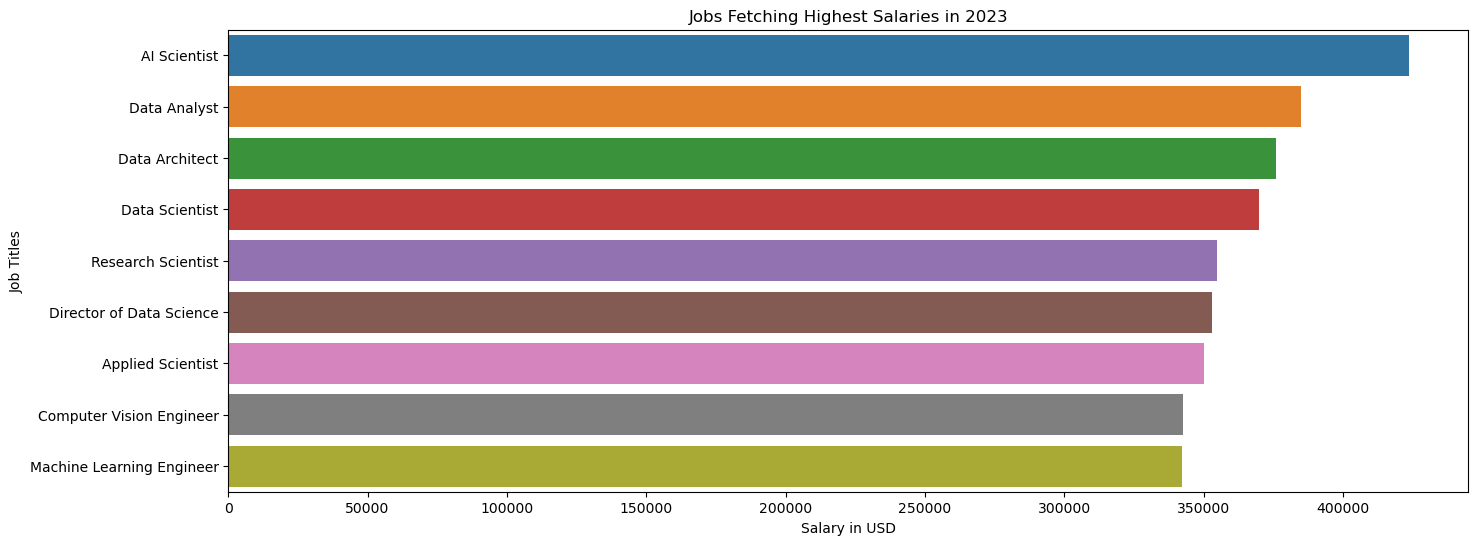

In [16]:
plt.figure(figsize=(16, 6))

sns.barplot(x=topSalaryJobs['salary_in_usd'], y=topSalaryJobs['job_title'])
plt.xlabel('Salary in USD')
plt.ylabel('Job Titles')
plt.title('Jobs Fetching Highest Salaries in 2023')

In [17]:
#TODO: Progression of salary with experience

#### Thank you for reading this notebook. I might update it with more visualizations sometime later.
#### Have a great day! :)